In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

check this lecture: https://www.quantrocket.com/codeload/quant-finance-lectures/quant_finance_lectures/Lecture41-Integration-Cointegration-and-Stationarity.ipynb.html

In [2]:
symbols = ['GDX','GDXJ','GLD', 'AAPL','GOOGL', 'FB','TWTR','AMD',
           'NVDA','CSCO', 'ORCL', 'ATVI', 'TTWO', 'EA', 'HYG', 
           'LQD', 'JNK', 'SLV', 'USLV', 'SIVR', 'USO', 'UWT', 
           'QQQ', 'SPY', 'VOO', 'VDE', 'VTI', 'EMLP', 'VDC', 
           'FSTA', 'KXI', 'IBB', 'VHT','VNQ', 'IYR', 'MSFT', 
           'PG', 'TMF', 'UPRO', 'WFC', 'JPM', 'GS', 'CVX', 
           'XOM', 'INTC', 'COST', 'WMT', 'T', 'VZ', 'CMCSA', 'AMZN']

# IBOVESPA symbols
symbols = ['RADL3.SA','SBSP3.SA','BBAS3.SA','PETR4.SA',
           'BBSE3.SA','ENBR3.SA','ITSA4.SA','ECOR3.SA',
           'BRKM5.SA','KLBN11.SA','OIBR4.SA','CCRO3.SA',
           'CMIG4.SA','BBDC4.SA','LREN3.SA','JBSS3.SA',
           'BBDC3.SA','USIM5.SA','VALE3.SA','UGPA3.SA',
           'PCAR3.SA','EQTL3.SA','PETR3.SA','BRML3.SA',
           'VIVT3.SA','MULT3.SA']

In [3]:
start = datetime.datetime(2020, 4, 1)
end = datetime.datetime(2022, 4, 1)
stock_df = yf.download(symbols, start = start, end = end)['Adj Close']

[*********************100%***********************]  26 of 26 completed


In [4]:
stock_df

,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BRKM5.SA,BRML3.SA,CCRO3.SA,CMIG4.SA,ECOR3.SA,ENBR3.SA,...,OIBR4.SA,PCAR3.SA,PETR3.SA,PETR4.SA,RADL3.SA,SBSP3.SA,UGPA3.SA,USIM5.SA,VALE3.SA,VIVT3.SA
Date,,,,,,,,,,,,,,,,,,,,,
2020-04-01,23.359015,12.512599,13.864283,21.538961,13.273562,9.406560,10.983996,4.429327,9.06,13.332164,...,0.88,58.923038,9.305126,9.533125,20.362371,34.397163,10.724809,4.070937,34.077648,41.339306
2020-04-02,23.630123,12.803088,13.940429,21.019733,13.763062,9.476164,10.804548,4.313734,9.00,13.091324,...,0.90,59.881283,10.104016,10.339774,20.647919,33.655521,10.790318,4.018857,33.614059,41.751873
2020-04-03,22.300819,12.301823,13.423340,20.849648,12.743274,8.800006,10.625103,4.177123,8.25,12.566639,...,0.88,57.964790,10.031985,10.226443,18.708176,32.087749,10.406620,3.541455,31.822565,41.182533
2020-04-06,24.364738,13.548018,14.695100,21.154016,13.510153,9.088367,11.371222,4.466106,9.35,13.512794,...,0.89,60.120846,10.575495,10.513103,19.102034,34.115532,11.632582,3.532775,33.889069,43.022575
2020-04-07,25.510389,14.299913,15.247124,22.362564,13.640687,9.068480,11.456223,4.555429,9.35,13.659016,...,0.91,60.590759,10.843974,10.933094,19.789312,35.993107,12.044353,3.567495,34.399803,42.742043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-28,34.819153,16.601849,20.096634,24.590000,41.926800,9.386672,13.886903,10.273832,7.85,21.811462,...,1.45,24.243040,28.398233,25.920246,23.630579,43.182503,14.121318,13.292241,95.339996,51.814861
2022-03-29,34.968552,16.810278,20.459223,24.799999,42.369301,9.496052,13.747736,10.665343,7.80,21.990400,...,1.45,24.685612,28.748209,26.494429,23.810278,44.024990,14.295894,13.510457,94.519997,51.571602
2022-03-30,34.759399,16.737782,20.332319,24.900000,42.018990,9.376729,13.568806,10.760050,7.51,22.093994,...,1.42,23.839809,29.256514,27.060410,24.009945,44.318882,14.111619,13.614822,95.870003,51.814861


In [5]:
stock_df.dropna(inplace=True)

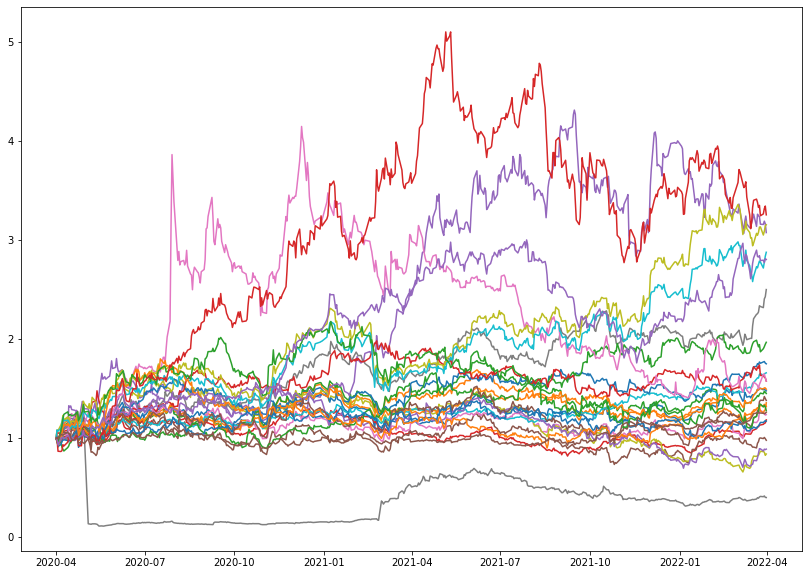

In [6]:
plt.figure(figsize=(14,10))
plt.plot(stock_df / stock_df.iloc[0])
plt.show()

<AxesSubplot:>

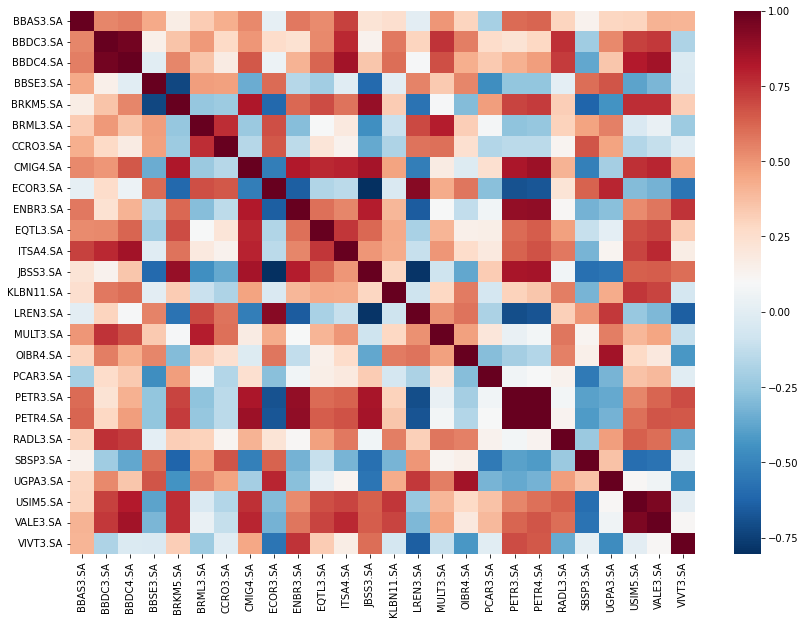

In [7]:
plt.figure(figsize=(14,10))
sns.heatmap(stock_df.corr(), cmap="RdBu_r")

In [8]:
def find_cointegrated_pairs(dataframe, critial_level = 0.05):
    n = dataframe.shape[1] # the length of dateframe
    pvalue_matrix = np.ones((n, n)) # initialize the matrix of p
    keys = dataframe.columns # get the column names
    pairs = [] # initilize the list for cointegration
    for i in range(n):
        for j in range(i+1, n): # for j bigger than i
            stock1 = dataframe[keys[i]] # obtain the price of "stock1"
            stock2 = dataframe[keys[j]]# obtain the price of "stock2"
            result = sm.tsa.stattools.coint(stock1, stock2) # get conintegration
            pvalue = result[1] # get the pvalue
            pvalue_matrix[i, j] = pvalue
            if pvalue < critial_level: # if p-value less than the critical level
                pairs.append((keys[i], keys[j], pvalue)) # record the contract with that p-value
    return pvalue_matrix, pairs

In [9]:
pvalue_matrix, pairs = find_cointegrated_pairs(stock_df)

# Convert our matrix of stored results into a DataFrame
pvalue_matrix_df = pd.DataFrame(pvalue_matrix)

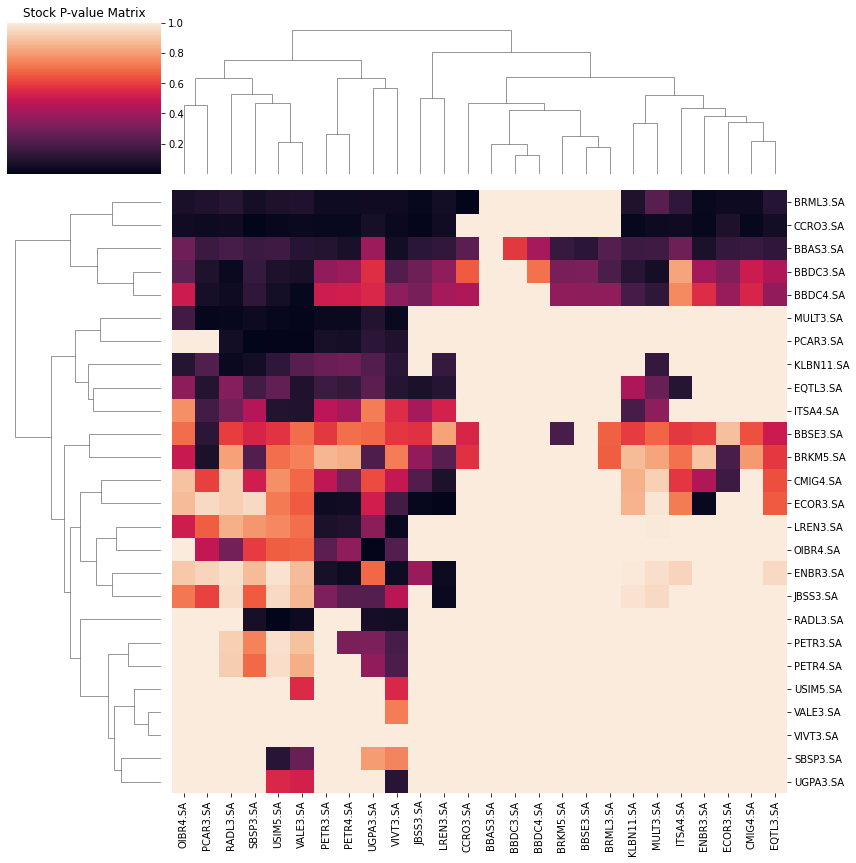

In [10]:
# Use Seaborn to plot a heatmap of our results matrix
sns.clustermap(pvalue_matrix_df, xticklabels=stock_df.columns,yticklabels=stock_df.columns, figsize=(12, 12))
plt.title('Stock P-value Matrix')
plt.tight_layout()
plt.show();

In [11]:
for pair in pairs:
    print("Asset {} and Asset {} has a co-integration score of {}".format(pair[0],pair[1],round(pair[2],4)))

Asset BBAS3.SA and Asset VIVT3.SA has a co-integration score of 0.0485
Asset BBDC3.SA and Asset RADL3.SA has a co-integration score of 0.0301
Asset BBDC4.SA and Asset RADL3.SA has a co-integration score of 0.0383
Asset BBDC4.SA and Asset VALE3.SA has a co-integration score of 0.0184
Asset BRML3.SA and Asset CCRO3.SA has a co-integration score of 0.0013
Asset BRML3.SA and Asset CMIG4.SA has a co-integration score of 0.0346
Asset BRML3.SA and Asset ECOR3.SA has a co-integration score of 0.0346
Asset BRML3.SA and Asset ENBR3.SA has a co-integration score of 0.0237
Asset BRML3.SA and Asset JBSS3.SA has a co-integration score of 0.0192
Asset BRML3.SA and Asset PETR3.SA has a co-integration score of 0.0373
Asset BRML3.SA and Asset PETR4.SA has a co-integration score of 0.0382
Asset BRML3.SA and Asset UGPA3.SA has a co-integration score of 0.0411
Asset BRML3.SA and Asset VIVT3.SA has a co-integration score of 0.0415
Asset CCRO3.SA and Asset CMIG4.SA has a co-integration score of 0.0181
Asset 

<AxesSubplot:xlabel='Date'>

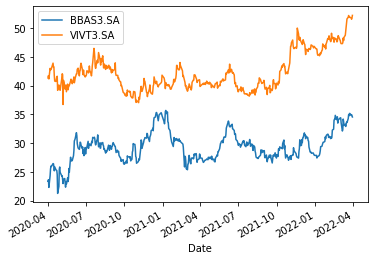

In [16]:
stock_df[['BBAS3.SA', 'VIVT3.SA']].plot()